# Import libraray

In [98]:
import pandas as pd
import numpy as np # for linear algebra
import math # for math operations 

import seaborn as sns # for plotting

# Load dataset

In [99]:

# Path to your Excel file
excel_file_path = r'C:\Users\JITENDRA\Downloads\Assignment 4.xlsx'

# Read first tab (Quarterly Series) into df1
df1 = pd.read_excel(excel_file_path, sheet_name='Quarterly Series')

# Read second tab (Monthly Series) into df2
df2 = pd.read_excel(excel_file_path, sheet_name='Monthly Series')


df1.head(5)


,Time,Series 1
0,15Q1,2856115.0
1,15Q2,2938482.0
2,15Q3,2855551.0
3,15Q4,3240672.0
4,16Q1,3171765.0


In [100]:
df2.head(5)

,Month,Series 1
0,1992-01-01,3253
1,1992-02-01,3042
2,1992-03-01,3246
3,1992-04-01,3164
4,1992-05-01,3211


In [101]:
df1.shape

(33, 2)

In [102]:
df2.shape

(204, 2)

#### Check missing value

In [103]:
# Check for missing values in df1
missing_values = df1.isna().sum()

# Display the count of missing values for each column
print("Missing values in df1:")
print(missing_values)


Missing values in df1:
Time        0
Series 1    0
dtype: int64


In [104]:
df1.shape

(33, 2)

# Convert the 'Time' column to a datetime object
Set the 'Time' column as the index of the DataFrame

In [105]:
# Convert the 'Time' column to a datetime object if it's not already in that format
df1['Time'] = pd.to_datetime(df1['Time'])

# Set the 'Time' column as the index of the DataFrame
df1.set_index('Time', inplace=True)

# Display the updated DataFrame
print("DataFrame after converting 'Time' column to datetime and setting it as index:")
print(df1.head())


DataFrame after converting 'Time' column to datetime and setting it as index:
             Series 1
Time                 
2015-01-01  2856115.0
2015-04-01  2938482.0
2015-07-01  2855551.0
2015-10-01  3240672.0
2016-01-01  3171765.0


## plot time series visualization

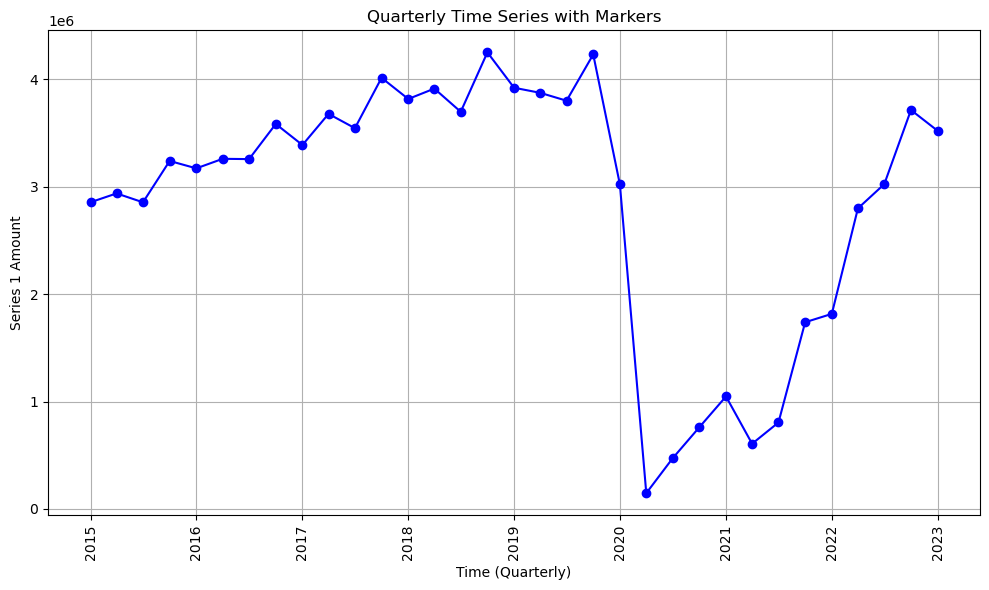

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Series 1'], marker='o', linestyle='-', color='b')
plt.title('Quarterly Time Series with Markers')
plt.xlabel('Time (Quarterly)')
plt.ylabel('Series 1 Amount')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### QUARTERLY BAR PLOT

<Figure size 1000x600 with 0 Axes>

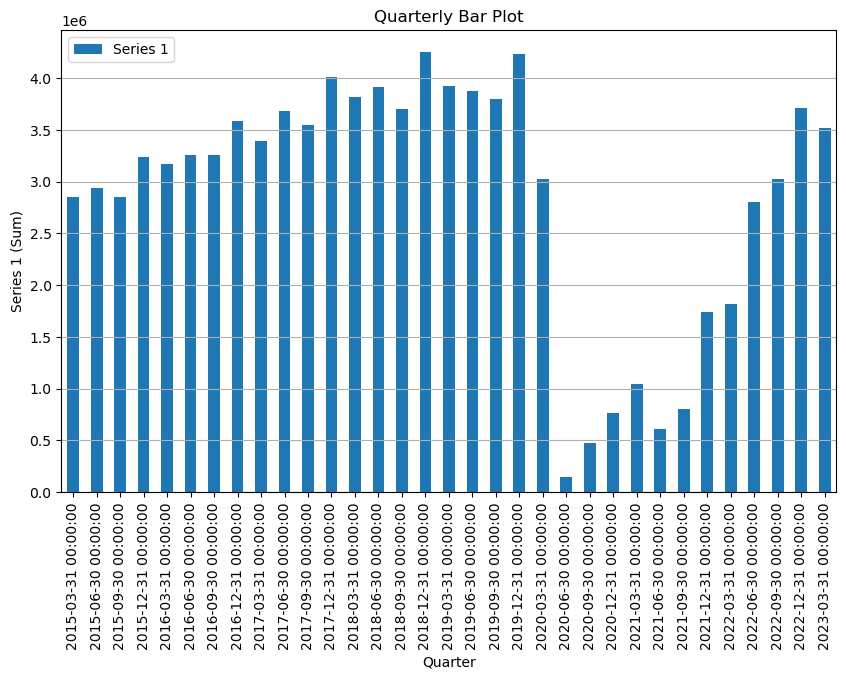

In [107]:
# Aggregate the data quarterly
df1_quarterly = df1.resample('Q').sum()

# Plot the quarterly data
plt.figure(figsize=(10, 6))
df1_quarterly.plot(kind='bar', figsize=(10, 6))
plt.title('Quarterly Bar Plot')
plt.xlabel('Quarter')
plt.ylabel('Series 1 (Sum)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend(loc='upper left')
plt.show()


### YEARLY BAR PLOT

<Figure size 1000x600 with 0 Axes>

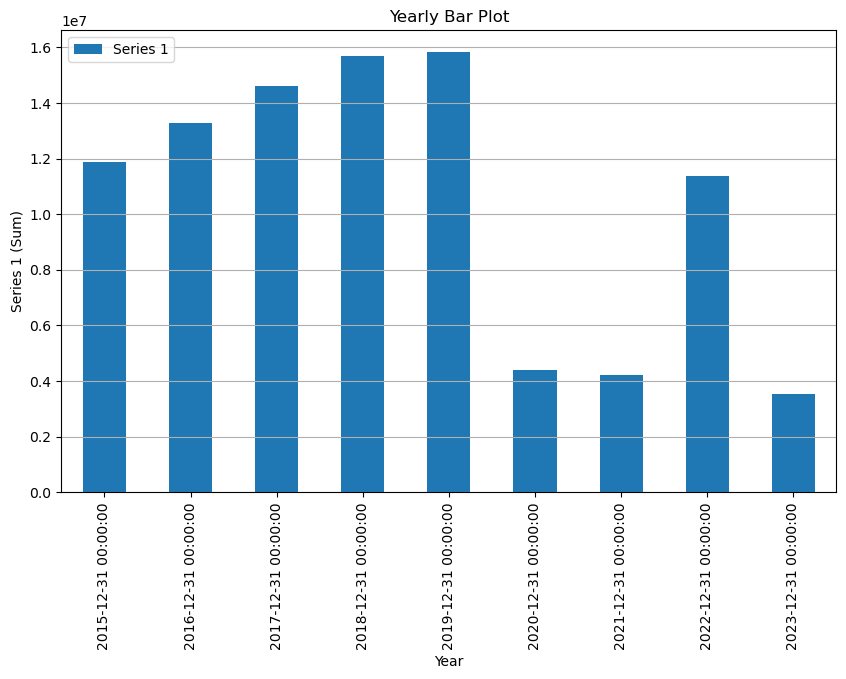

In [108]:
# Aggregate the data yearly
df1_yearly = df1.resample('Y').sum()

# Plot the yearly data
plt.figure(figsize=(10, 6))
df1_yearly.plot(kind='bar', figsize=(10, 6))
plt.title('Yearly Bar Plot')
plt.xlabel('Year')
plt.ylabel('Series 1 (Sum)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend(loc='upper left')
plt.show()


### SCATTER PLOT

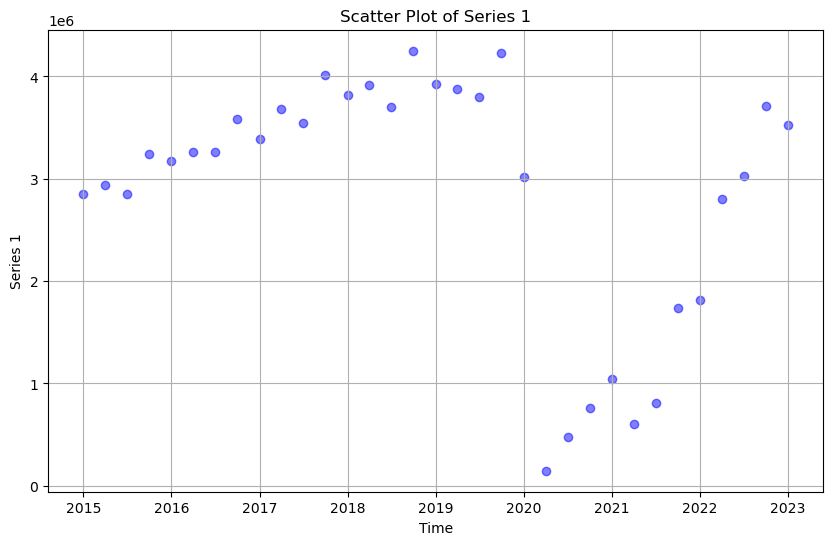

In [109]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df1.index, df1['Series 1'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Series 1')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.grid(True)
plt.show()


#### QUARTERLY PI CHART

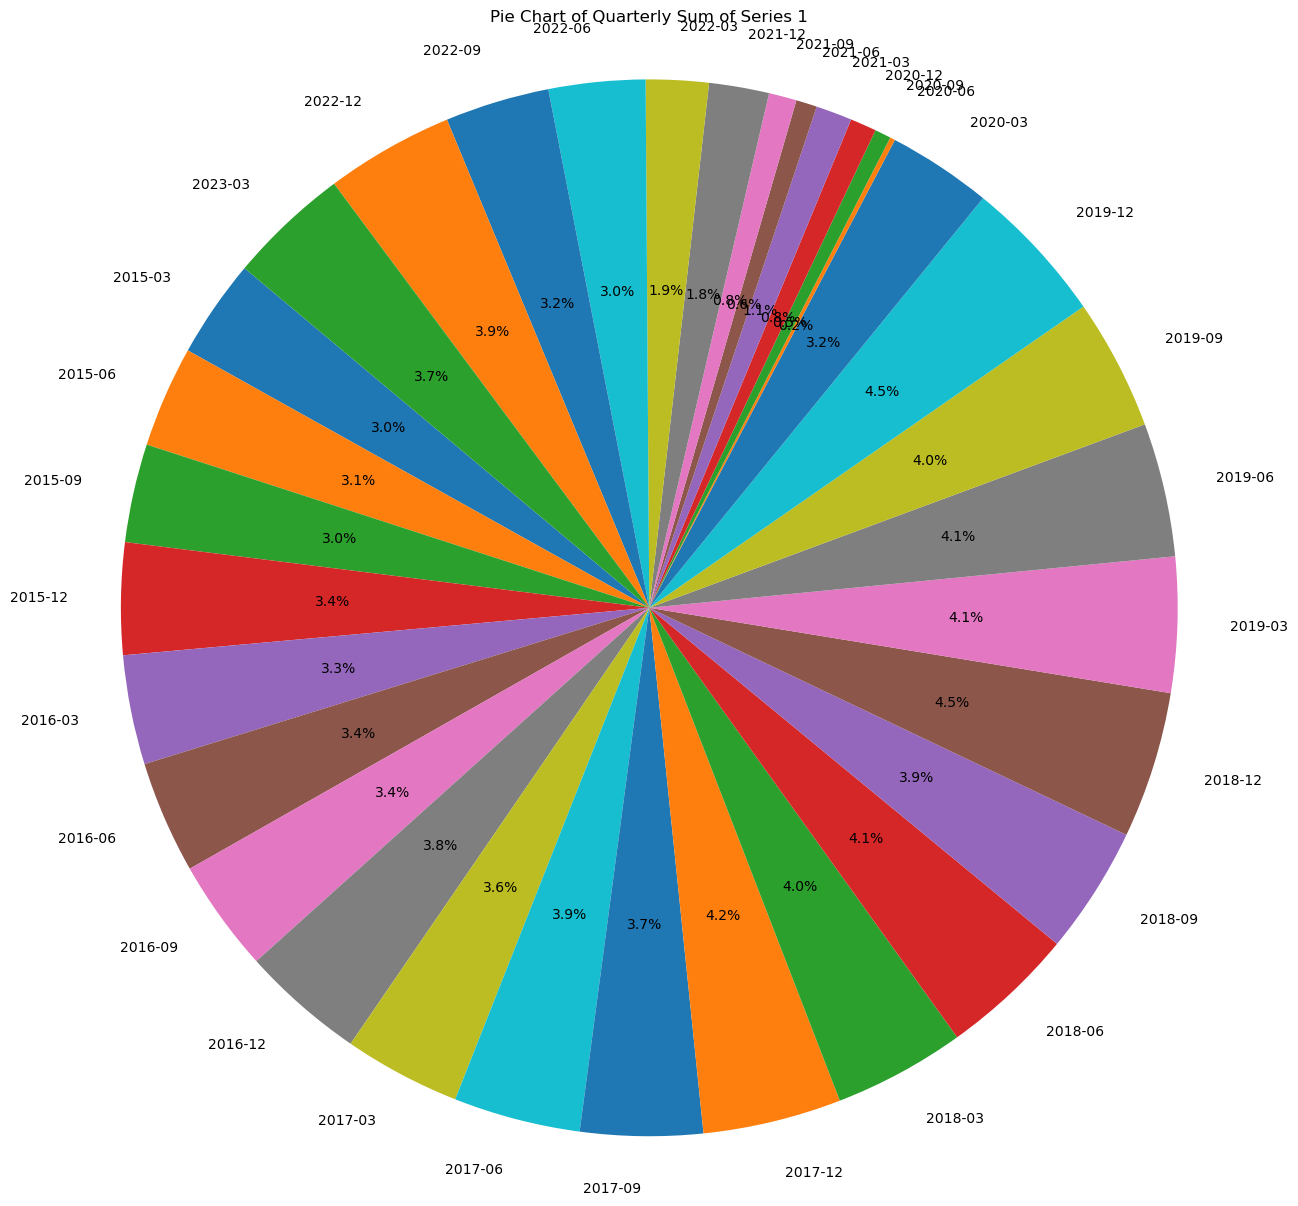

In [110]:
# Aggregate data quarterly
df1_quarterly_sum = df1.resample('Q').sum()

# Plot the pie chart
plt.figure(figsize=(15, 15))
plt.pie(df1_quarterly_sum['Series 1'], labels=df1_quarterly_sum.index.strftime('%Y-%m'), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Quarterly Sum of Series 1')
plt.axis('equal')
plt.show()


#### PLOT HISTOFRAM

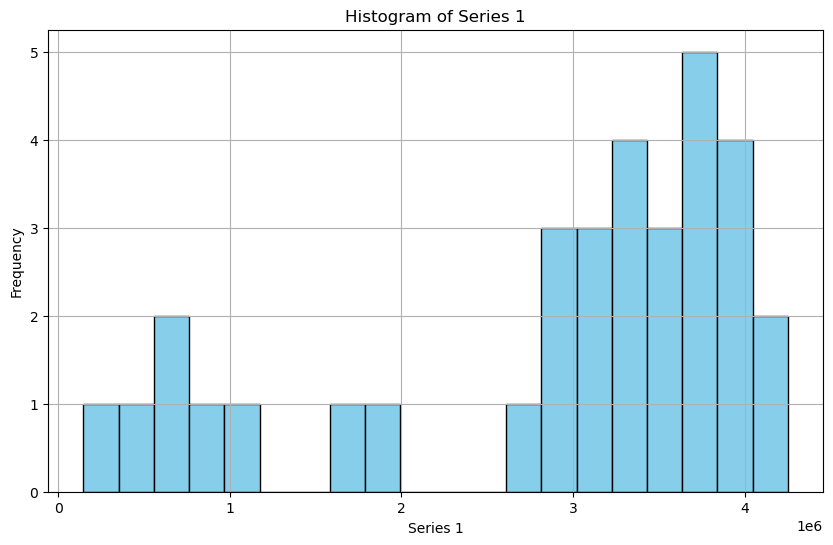

In [111]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df1['Series 1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Series 1')
plt.xlabel('Series 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### PLOT ROLLING MEAN

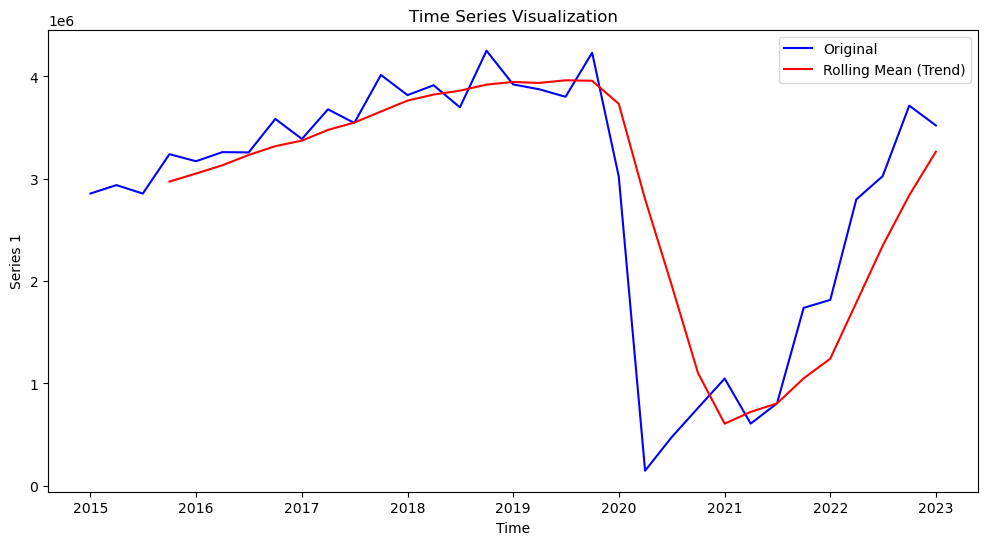

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the time series
plt.figure(figsize=(12, 6))

# Plot the original time series
plt.plot(df1.index, df1['Series 1'], color='blue', label='Original')

# Plot rolling mean (trend)
rolling_mean = df1['Series 1'].rolling(window=4).mean()  # Assuming quarterly rolling mean
plt.plot(df1.index, rolling_mean, color='red', label='Rolling Mean (Trend)')

# Add legend and labels
plt.title('Time Series Visualization')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()

# Show plot
plt.show()


### seasonal decomposition,  Plot the decomposition components,Original series, Trend component, Seasonal component,Residuals

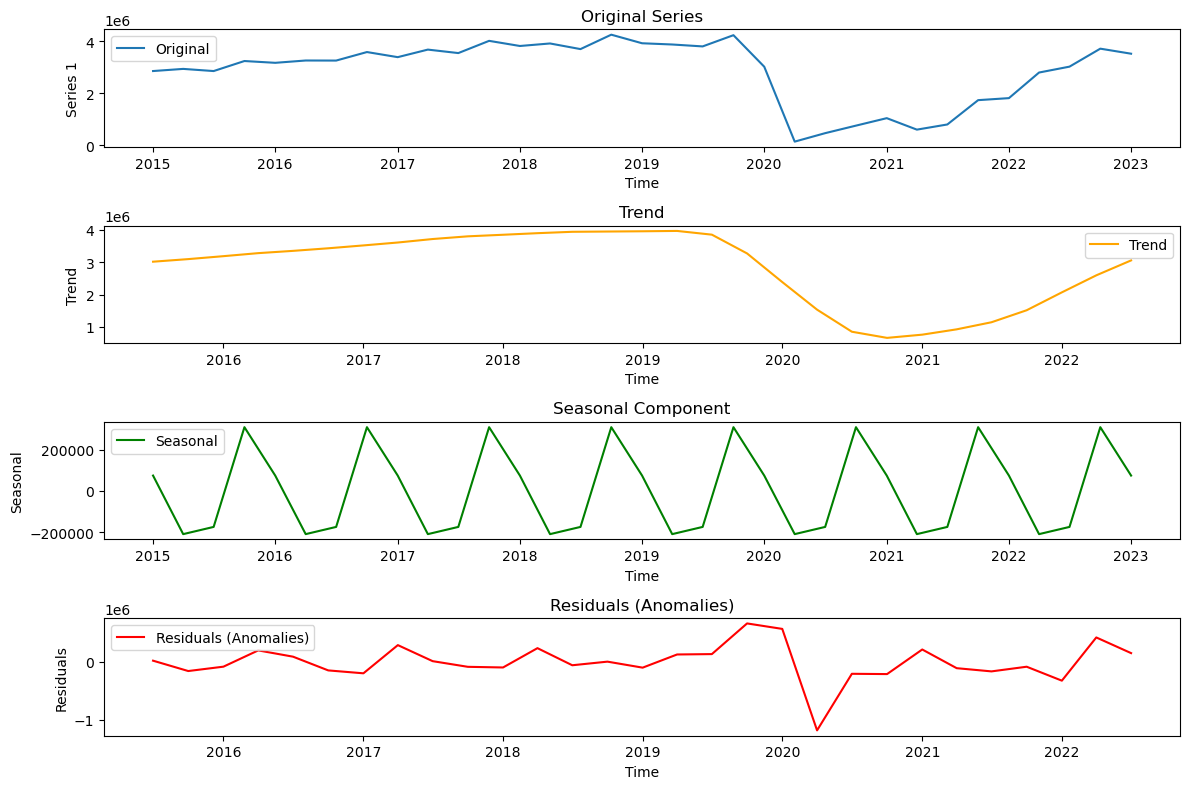

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df1['Series 1'], model='additive', period=4)  # Assuming quarterly seasonality (period=4)

# Plot the decomposition components
plt.figure(figsize=(12, 8))

# Original series
plt.subplot(4, 1, 1)
plt.plot(df1.index, df1['Series 1'], label='Original')
plt.title('Original Series')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(df1.index, result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.xlabel('Time')
plt.ylabel('Trend')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(df1.index, result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.xlabel('Time')
plt.ylabel('Seasonal')
plt.legend()

# Residuals (Anomalies) component
plt.subplot(4, 1, 4)
plt.plot(df1.index, result.resid, label='Residuals (Anomalies)', color='red')
plt.title('Residuals (Anomalies)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()


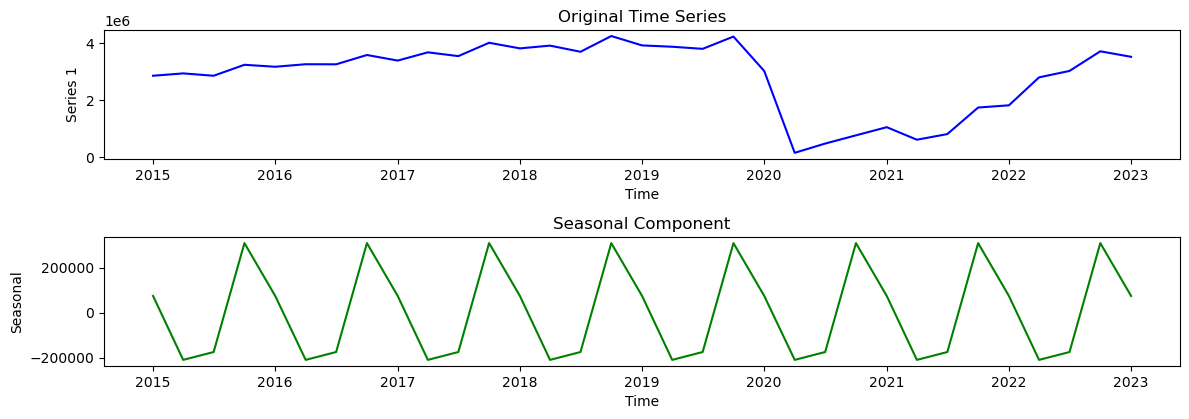

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df1['Series 1'], model='additive', period=4)  # Assuming quarterly seasonality (period=4)

# Plot the decomposition components
plt.figure(figsize=(12, 8))

# Plot the original time series
plt.subplot(4, 1, 1)
plt.plot(df1.index, df1['Series 1'], color='blue')
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Series 1')

# Plot the seasonal component
plt.subplot(4, 1, 2)
plt.plot(df1.index, result.seasonal, color='green')
plt.title('Seasonal Component')
plt.xlabel('Time')
plt.ylabel('Seasonal')

plt.tight_layout()
plt.show()


## Plot rolling statistics, 

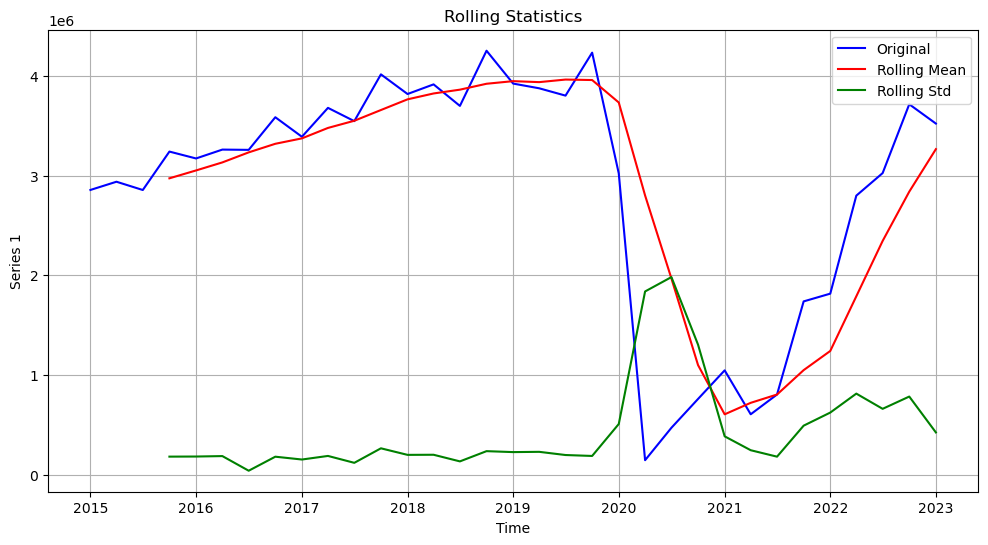

ADF Statistic: -1.50651636064884
p-value: 0.5302853608153731
Critical Values:
   1%: -3.653519805908203
   5%: -2.9572185644531253
   10%: -2.6175881640625
The time series is likely non-stationary.


In [115]:
from statsmodels.tsa.stattools import adfuller

# Calculate rolling statistics
rolling_mean = df1['Series 1'].rolling(window=4).mean()
rolling_std = df1['Series 1'].rolling(window=4).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], color='blue', label='Original')
plt.plot(df1.index, rolling_mean, color='red', label='Rolling Mean')
plt.plot(df1.index, rolling_std, color='green', label='Rolling Std')
plt.title('Rolling Statistics')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Perform Augmented Dickey-Fuller test
result_adf = adfuller(df1['Series 1'])
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'   {key}: {value}')

# Check stationarity based on p-value
if result_adf[1] > 0.05:
    print("The time series is likely non-stationary.")
else:
    print("The time series is likely stationary.")


## difference of order 1

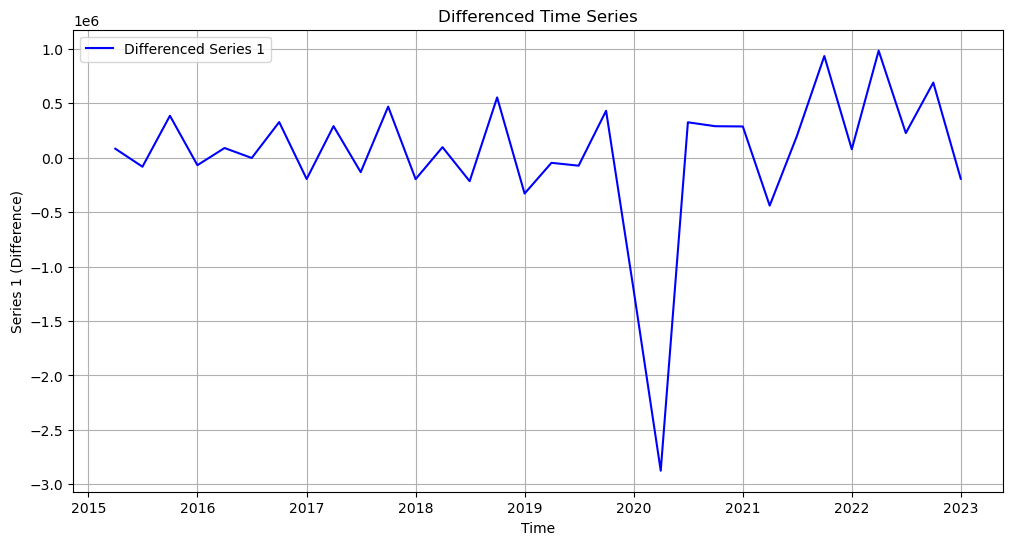

ADF Statistic (Differenced Series): -4.718257478664435
p-value (Differenced Series): 7.775231413078505e-05
Critical Values (Differenced Series):
   1%: -3.661428725118324
   5%: -2.960525341210433
   10%: -2.6193188033298647
The differenced time series is likely stationary.


In [116]:
# Perform differencing
df1['Series 1_diff'] = df1['Series 1'].diff()

# Plot the differenced time series
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1_diff'], color='blue', label='Differenced Series 1')
plt.title('Differenced Time Series')
plt.xlabel('Time')
plt.ylabel('Series 1 (Difference)')
plt.legend()
plt.grid(True)
plt.show()

# Perform Augmented Dickey-Fuller test on the differenced series
result_adf_diff = adfuller(df1['Series 1_diff'].dropna())
print('ADF Statistic (Differenced Series):', result_adf_diff[0])
print('p-value (Differenced Series):', result_adf_diff[1])
print('Critical Values (Differenced Series):')
for key, value in result_adf_diff[4].items():
    print(f'   {key}: {value}')

# Check stationarity based on p-value of the differenced series
if result_adf_diff[1] > 0.05:
    print("The differenced time series is likely non-stationary.")
else:
    print("The differenced time series is likely stationary.")


## PLOT ACF AND PACF 

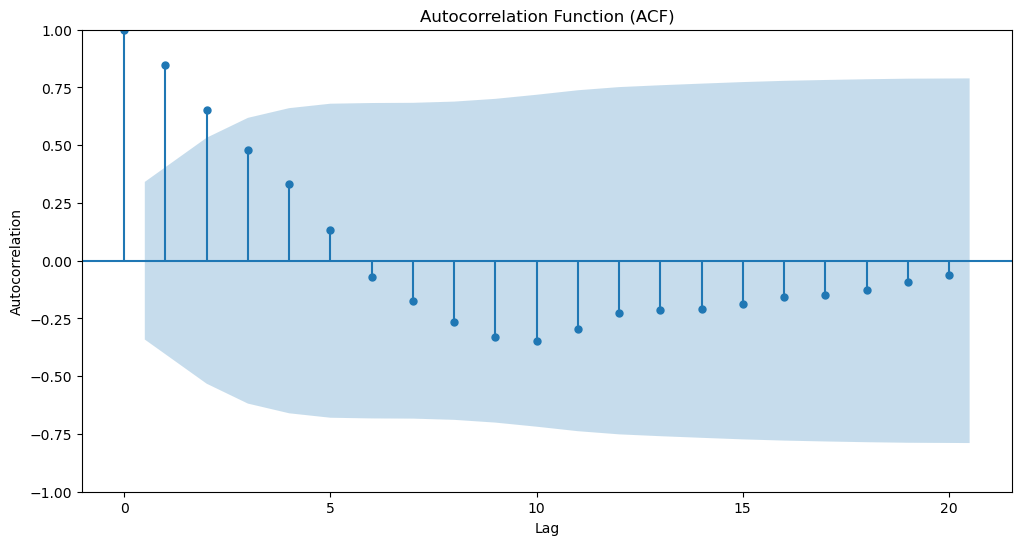

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


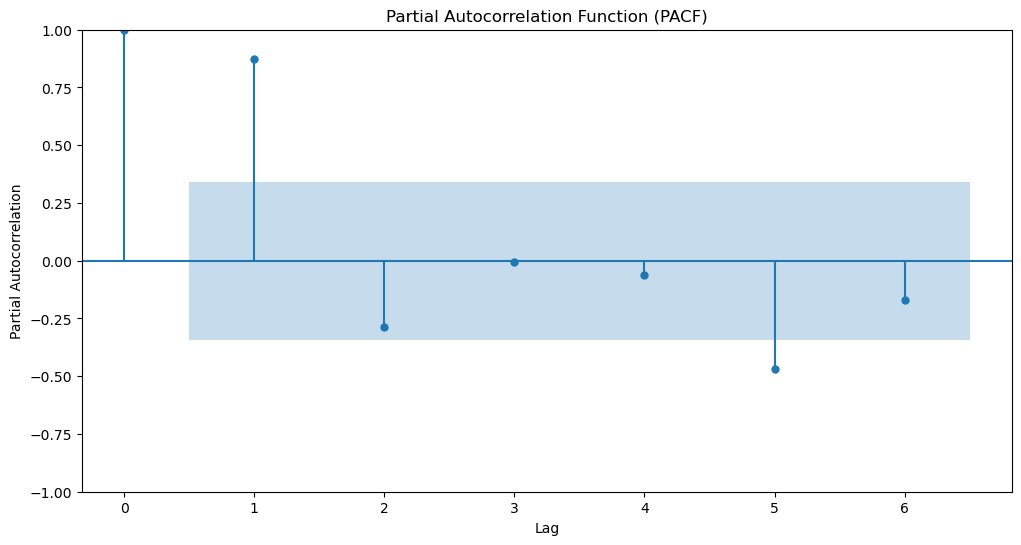

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF (AutoCorrelation Function)
plt.figure(figsize=(12, 6))
plot_acf(df1['Series 1'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF (Partial AutoCorrelation Function)
plt.figure(figsize=(12, 6))
plot_pacf(df1['Series 1'], lags=6, ax=plt.gca())  # Set lags to 6 or lower
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


## SPLIT TRAINING AND TESTING 70:30 RATIO

In [118]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(df1['Series 1'], test_size=0.3, shuffle=False)

# Print the lengths of training and testing sets
print("Training set length:", len(train_data))
print("Testing set length:", len(test_data))

# Print the training and testing sets
print("Training set:")
print(train_data)
print("\nTesting set:")
print(test_data)


Training set length: 23
Testing set length: 10
Training set:
Time
2015-01-01    2856115.0
2015-04-01    2938482.0
2015-07-01    2855551.0
2015-10-01    3240672.0
2016-01-01    3171765.0
2016-04-01    3260624.0
2016-07-01    3257929.5
2016-10-01    3585015.5
2017-01-01    3389152.0
2017-04-01    3678904.0
2017-07-01    3545922.5
2017-10-01    4014879.5
2018-01-01    3817801.0
2018-04-01    3914325.0
2018-07-01    3698440.0
2018-10-01    4251713.5
2019-01-01    3922289.0
2019-04-01    3875069.0
2019-07-01    3801610.5
2019-10-01    4232362.0
2020-01-01    3022010.5
2020-04-01     147123.0
2020-07-01     472153.0
Name: Series 1, dtype: float64

Testing set:
Time
2020-10-01     761055.5
2021-01-01    1047814.5
2021-04-01     607466.0
2021-07-01     805567.5
2021-10-01    1738901.0
2022-01-01    1816649.0
2022-04-01    2798962.0
2022-07-01    3025077.0
2022-10-01    3715004.0
2023-01-01    3521498.0
Name: Series 1, dtype: float64


# AR model (1,0,0)

In [119]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit ARIMA model on the training set
model = ARIMA(train_data, order=(1, 0, 0))
model_fit = model.fit()

# Print ARIMA model results
print(model_fit.summary())

# Forecast using the ARIMA model on the training set
train_forecast = model_fit.fittedvalues

# Calculate evaluation metrics on the training set
train_mae = mean_absolute_error(train_data, train_forecast)
train_rmse = mean_squared_error(train_data, train_forecast, squared=False)

# Calculate MASE on the training set
naive_train_forecast = train_data.shift(4)  # Assuming quarterly seasonality
naive_train_residuals = train_data - naive_train_forecast
scaling_factor_train = np.mean(np.abs(naive_train_residuals))
train_mase = train_mae / scaling_factor_train

# Print evaluation metrics on the training set
print("Training Mean Absolute Error (MAE):", train_mae)
print("Training Root Mean Squared Error (RMSE):", train_rmse)
print("Training Mean Absolute Scaled Error (MASE):", train_mase)


                               SARIMAX Results                                
Dep. Variable:               Series 1   No. Observations:                   23
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -342.555
Date:                Thu, 11 Apr 2024   AIC                            691.110
Time:                        11:51:18   BIC                            694.516
Sample:                    01-01-2015   HQIC                           691.967
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.259e+06   7.79e+05      4.185      0.000    1.73e+06    4.78e+06
ar.L1          0.8118      0.267      3.045      0.002       0.289       1.334
sigma2      4.985e+11      8.642   5.77e+10      0.0

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


# plot predicted and forecast next 12 quarter

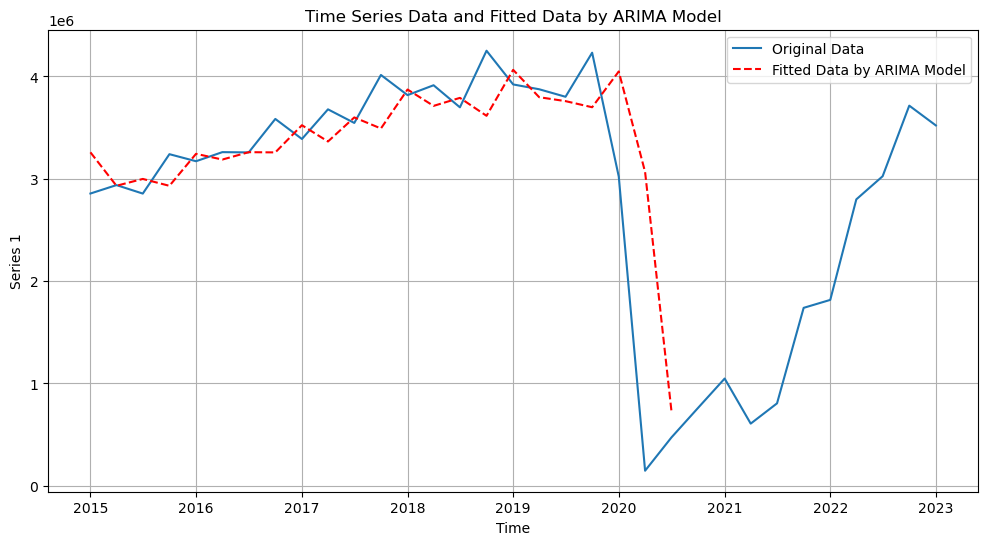

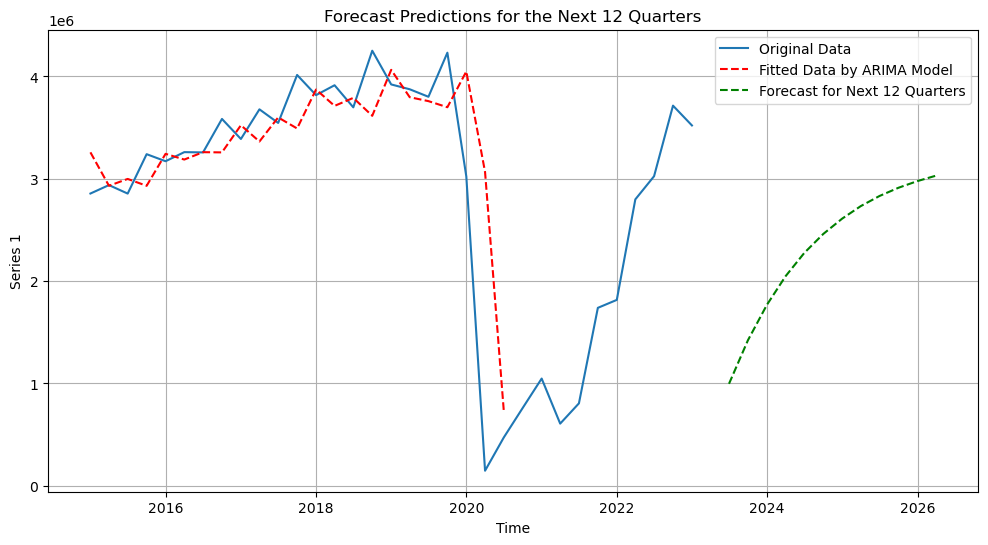

Forecasted Values for the Next 12 Quarters:
2023-06-30    9.965345e+05
2023-09-30    1.422236e+06
2023-12-31    1.767827e+06
2024-03-31    2.048384e+06
2024-06-30    2.276144e+06
2024-09-30    2.461044e+06
2024-12-31    2.611148e+06
2025-03-31    2.733005e+06
2025-06-30    2.831931e+06
2025-09-30    2.912241e+06
2025-12-31    2.977437e+06
2026-03-31    3.030365e+06
Freq: Q-DEC, Name: predicted_mean, dtype: float64
Forecasted values saved to 'forecasted_values.xlsx'


In [120]:


# Plot Visualization of Time Series Data and Fitted Data
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data')
plt.plot(train_data.index, train_forecast, label='Fitted Data by ARIMA Model', linestyle='--', color='red')
plt.title('Time Series Data and Fitted Data by ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Plot Forecast Predictions for the Next 12 Quarters
forecast_next_12_quarters = model_fit.forecast(steps=12)
forecast_next_12_quarters.index = pd.date_range(start='2023-06-30', periods=12, freq='Q')
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data')
plt.plot(train_data.index, train_forecast, label='Fitted Data by ARIMA Model', linestyle='--', color='red')
plt.plot(forecast_next_12_quarters.index, forecast_next_12_quarters, label='Forecast for Next 12 Quarters', linestyle='--', color='green')
plt.title('Forecast Predictions for the Next 12 Quarters')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Print Numerical Values of Forecasted Data
print("Forecasted Values for the Next 12 Quarters:")
print(forecast_next_12_quarters)

# Save Forecasted Data to an Excel file
forecast_next_12_quarters.to_excel('forecasted_values_AR_2,0,0.xlsx', index_label='Quarter')
print("Forecasted values saved to 'forecasted_values.xlsx'")


### AR model order (5,0,0)

In [121]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit ARIMA model on the training set
model = ARIMA(train_data, order=(5, 0, 0))
model_fit = model.fit()

# Print ARIMA model results
print(model_fit.summary())

# Forecast using the ARIMA model on the training set
train_forecast = model_fit.fittedvalues

# Calculate evaluation metrics on the training set
train_mae = mean_absolute_error(train_data, train_forecast)
train_rmse = mean_squared_error(train_data, train_forecast, squared=False)

# Calculate MASE on the training set
naive_train_forecast = train_data.shift(4)  # Assuming quarterly seasonality
naive_train_residuals = train_data - naive_train_forecast
scaling_factor_train = np.mean(np.abs(naive_train_residuals))
train_mase = train_mae / scaling_factor_train

# Print evaluation metrics on the training set
print("Training Mean Absolute Error (MAE):", train_mae)
print("Training Root Mean Squared Error (RMSE):", train_rmse)
print("Training Mean Absolute Scaled Error (MASE):", train_mase)


                               SARIMAX Results                                
Dep. Variable:               Series 1   No. Observations:                   23
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -340.224
Date:                Thu, 11 Apr 2024   AIC                            694.447
Time:                        11:51:21   BIC                            702.396
Sample:                    01-01-2015   HQIC                           696.446
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.259e+06   6.47e+05      5.037      0.000    1.99e+06    4.53e+06
ar.L1          1.0799      0.145      7.443      0.000       0.796       1.364
ar.L2         -0.6302      0.349     -1.805      0.0

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


### plot predicted and forecast next 12 quarter

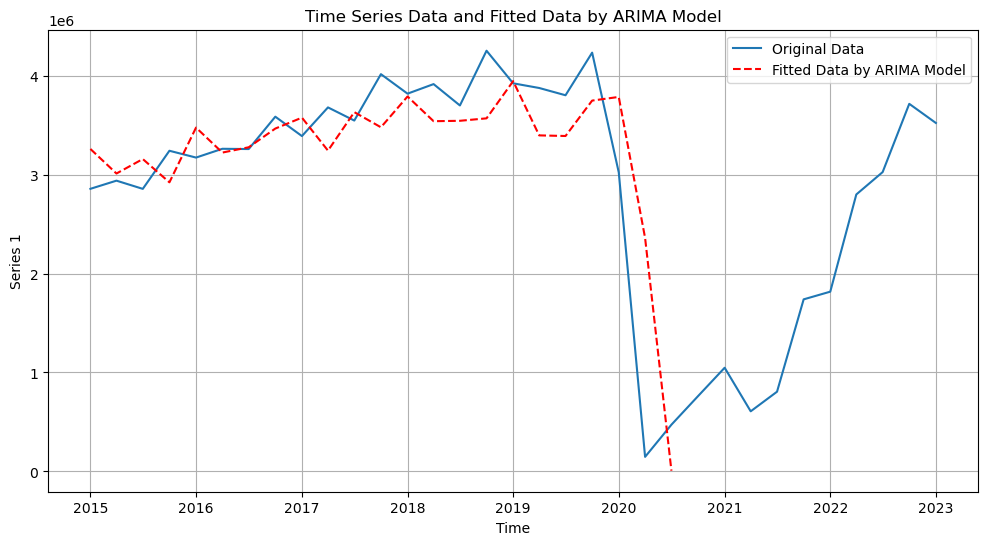

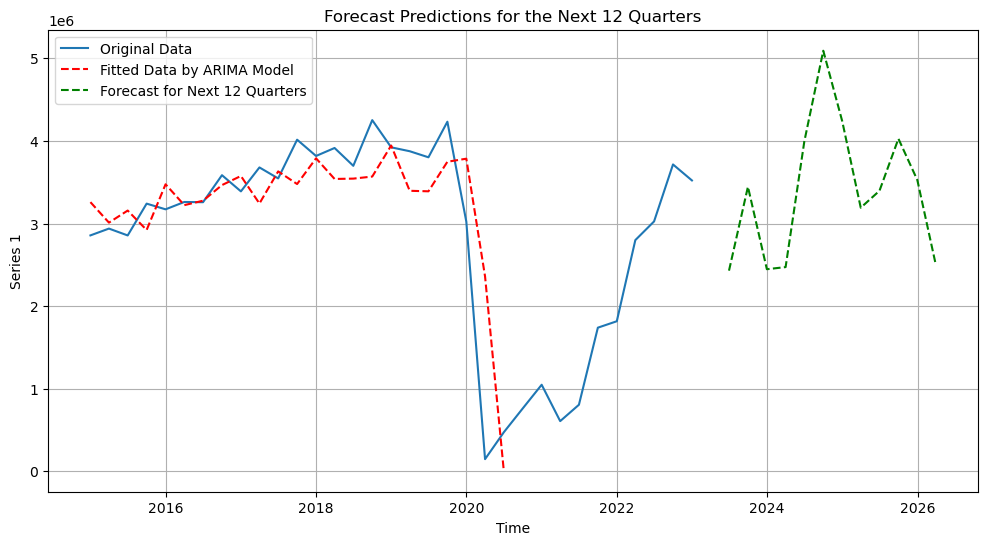

Forecasted Values for the Next 12 Quarters:
2023-06-30    2.429241e+06
2023-09-30    3.445039e+06
2023-12-31    2.446739e+06
2024-03-31    2.472322e+06
2024-06-30    3.994660e+06
2024-09-30    5.091927e+06
2024-12-31    4.238961e+06
2025-03-31    3.191344e+06
2025-06-30    3.396090e+06
2025-09-30    4.026545e+06
2025-12-31    3.525290e+06
2026-03-31    2.496483e+06
Freq: Q-DEC, Name: predicted_mean, dtype: float64
Forecasted values saved to 'forecasted_values.xlsx'


In [122]:
# Plot Visualization of Time Series Data and Fitted Data
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data')
plt.plot(train_data.index, train_forecast, label='Fitted Data by ARIMA Model', linestyle='--', color='red')
plt.title('Time Series Data and Fitted Data by ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Plot Forecast Predictions for the Next 12 Quarters
forecast_next_12_quarters = model_fit.forecast(steps=12)
forecast_next_12_quarters.index = pd.date_range(start='2023-06-30', periods=12, freq='Q')
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data')
plt.plot(train_data.index, train_forecast, label='Fitted Data by ARIMA Model', linestyle='--', color='red')
plt.plot(forecast_next_12_quarters.index, forecast_next_12_quarters, label='Forecast for Next 12 Quarters', linestyle='--', color='green')
plt.title('Forecast Predictions for the Next 12 Quarters')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Print Numerical Values of Forecasted Data
print("Forecasted Values for the Next 12 Quarters:")
print(forecast_next_12_quarters)

# Save Forecasted Data to an Excel file
forecast_next_12_quarters.to_excel('forecasted_values_AR_3,0,0.xlsx', index_label='Quarter')
print("Forecasted values saved to 'forecasted_values.xlsx'")


### MA MODEL WITH ORDER (0,0,1)

In [123]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit ARIMA model on the training set
model = ARIMA(train_data, order=(0, 0, 1))
model_fit = model.fit()

# Print ARIMA model results
print(model_fit.summary())

# Forecast using the ARIMA model on the training set
train_forecast = model_fit.fittedvalues

# Calculate evaluation metrics on the training set
train_mae = mean_absolute_error(train_data, train_forecast)
train_rmse = mean_squared_error(train_data, train_forecast, squared=False)

# Calculate MASE on the training set
naive_train_forecast = train_data.shift(4)  # Assuming quarterly seasonality
naive_train_residuals = train_data - naive_train_forecast
scaling_factor_train = np.mean(np.abs(naive_train_residuals))
train_mase = train_mae / scaling_factor_train

# Print evaluation metrics on the training set
print("Training Mean Absolute Error (MAE):", train_mae)
print("Training Root Mean Squared Error (RMSE):", train_rmse)
print("Training Mean Absolute Scaled Error (MASE):", train_mase)


                               SARIMAX Results                                
Dep. Variable:               Series 1   No. Observations:                   23
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -343.504
Date:                Thu, 11 Apr 2024   AIC                            693.009
Time:                        11:51:23   BIC                            696.415
Sample:                    01-01-2015   HQIC                           693.865
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.259e+06   4.13e+05      7.881      0.000    2.45e+06    4.07e+06
ma.L1          0.6882      0.161      4.272      0.000       0.372       1.004
sigma2      5.126e+11      0.039   1.32e+13      0.0

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


### plot predicted and forecast next 12 quarter

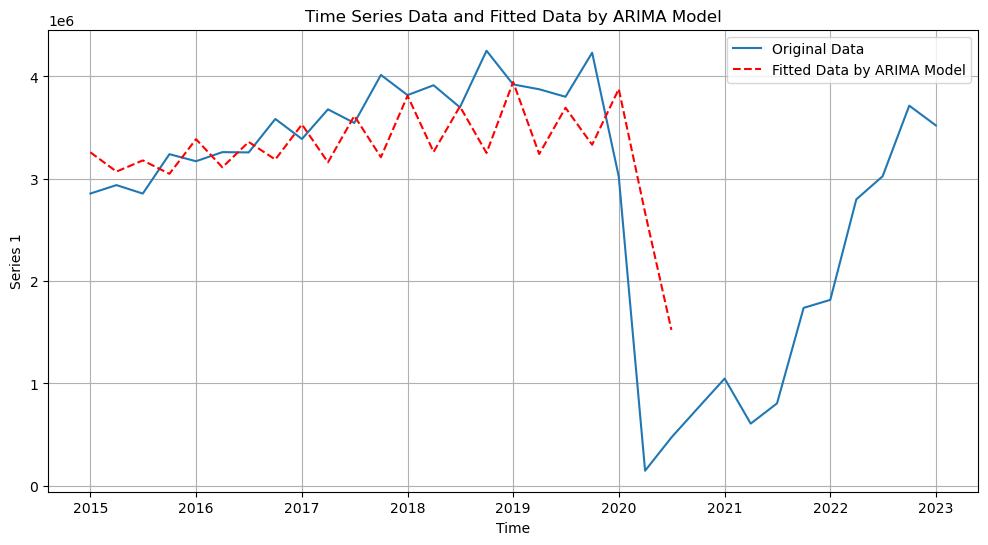

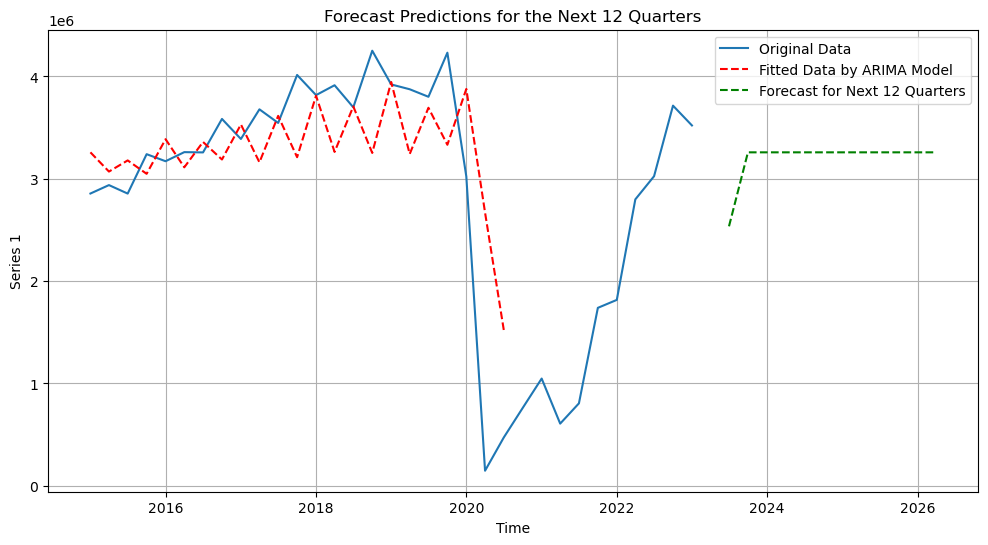

Forecasted Values for the Next 12 Quarters:
2023-06-30    2.535714e+06
2023-09-30    3.258692e+06
2023-12-31    3.258692e+06
2024-03-31    3.258692e+06
2024-06-30    3.258692e+06
2024-09-30    3.258692e+06
2024-12-31    3.258692e+06
2025-03-31    3.258692e+06
2025-06-30    3.258692e+06
2025-09-30    3.258692e+06
2025-12-31    3.258692e+06
2026-03-31    3.258692e+06
Freq: Q-DEC, Name: predicted_mean, dtype: float64
Forecasted values saved to 'forecasted_values.xlsx'


In [124]:
# Plot Visualization of Time Series Data and Fitted Data
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data')
plt.plot(train_data.index, train_forecast, label='Fitted Data by ARIMA Model', linestyle='--', color='red')
plt.title('Time Series Data and Fitted Data by ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Plot Forecast Predictions for the Next 12 Quarters
forecast_next_12_quarters = model_fit.forecast(steps=12)
forecast_next_12_quarters.index = pd.date_range(start='2023-06-30', periods=12, freq='Q')
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data')
plt.plot(train_data.index, train_forecast, label='Fitted Data by ARIMA Model', linestyle='--', color='red')
plt.plot(forecast_next_12_quarters.index, forecast_next_12_quarters, label='Forecast for Next 12 Quarters', linestyle='--', color='green')
plt.title('Forecast Predictions for the Next 12 Quarters')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Print Numerical Values of Forecasted Data
print("Forecasted Values for the Next 12 Quarters:")
print(forecast_next_12_quarters)

# Save Forecasted Data to an Excel file
forecast_next_12_quarters.to_excel('forecasted_values_AR_0,0,1.xlsx', index_label='Quarter')
print("Forecasted values saved to 'forecasted_values.xlsx'")


### MA MODEL WITH ORDER (0,0,2)

In [125]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit ARIMA model on the training set
model = ARIMA(train_data, order=(0, 0, 2))
model_fit = model.fit()

# Print ARIMA model results
print(model_fit.summary())

# Forecast using the ARIMA model on the training set
train_forecast = model_fit.fittedvalues

# Calculate evaluation metrics on the training set
train_mae = mean_absolute_error(train_data, train_forecast)
train_rmse = mean_squared_error(train_data, train_forecast, squared=False)

# Calculate MASE on the training set
naive_train_forecast = train_data.shift(4)  # Assuming quarterly seasonality
naive_train_residuals = train_data - naive_train_forecast
scaling_factor_train = np.mean(np.abs(naive_train_residuals))
train_mase = train_mae / scaling_factor_train

# Print evaluation metrics on the training set
print("Training Mean Absolute Error (MAE):", train_mae)
print("Training Root Mean Squared Error (RMSE):", train_rmse)
print("Training Mean Absolute Scaled Error (MASE):", train_mase)


                               SARIMAX Results                                
Dep. Variable:               Series 1   No. Observations:                   23
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -340.047
Date:                Thu, 11 Apr 2024   AIC                            688.093
Time:                        11:51:25   BIC                            692.635
Sample:                    01-01-2015   HQIC                           689.235
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.259e+06   6.65e+05      4.898      0.000    1.95e+06    4.56e+06
ma.L1          1.1417      0.257      4.448      0.000       0.639       1.645
ma.L2          0.6485      0.423      1.532      0.1

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


### plot predicted and forecast next 12 quarter

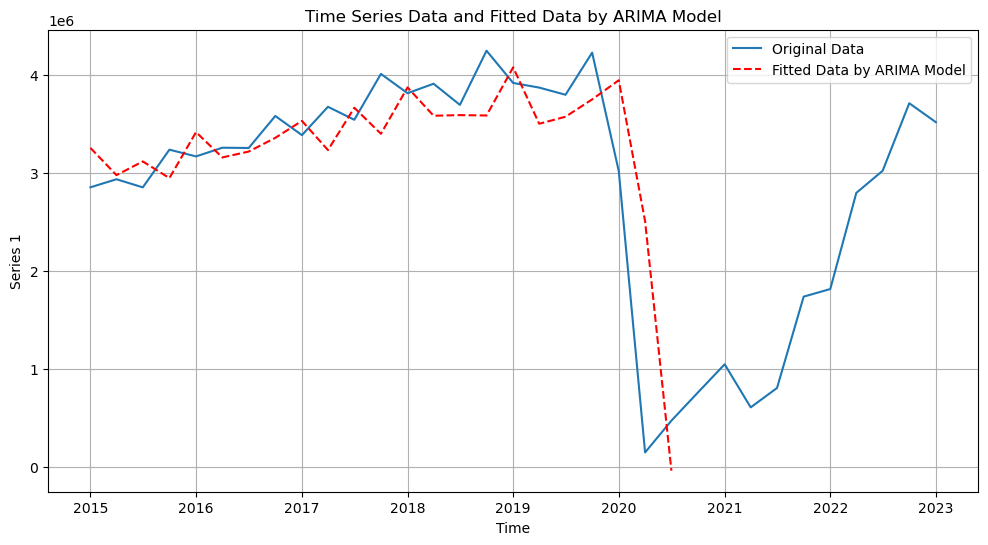

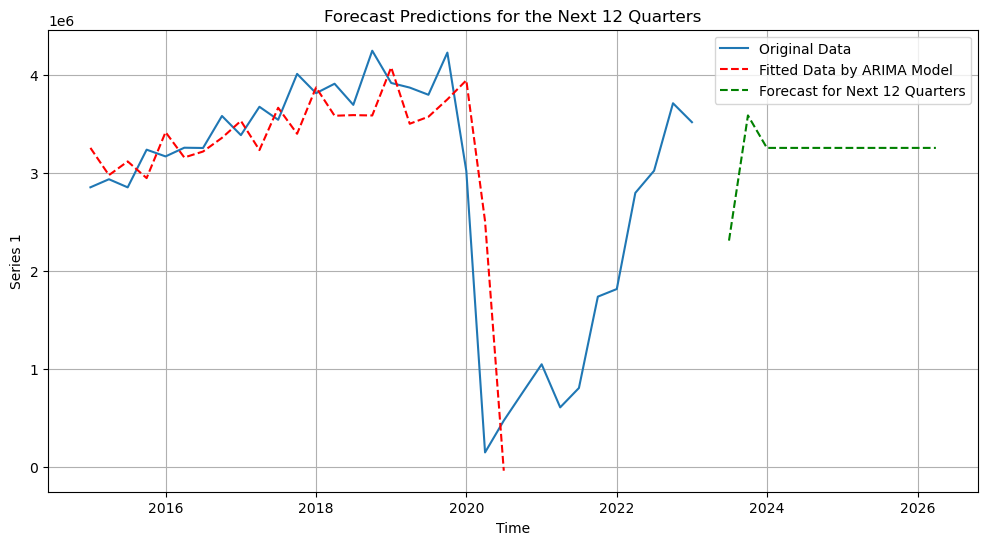

Forecasted Values for the Next 12 Quarters:
2023-06-30    2.311465e+06
2023-09-30    3.590680e+06
2023-12-31    3.258692e+06
2024-03-31    3.258692e+06
2024-06-30    3.258692e+06
2024-09-30    3.258692e+06
2024-12-31    3.258692e+06
2025-03-31    3.258692e+06
2025-06-30    3.258692e+06
2025-09-30    3.258692e+06
2025-12-31    3.258692e+06
2026-03-31    3.258692e+06
Freq: Q-DEC, Name: predicted_mean, dtype: float64
Forecasted values saved to 'forecasted_values.xlsx'


In [126]:
# Plot Visualization of Time Series Data and Fitted Data
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data')
plt.plot(train_data.index, train_forecast, label='Fitted Data by ARIMA Model', linestyle='--', color='red')
plt.title('Time Series Data and Fitted Data by ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Plot Forecast Predictions for the Next 12 Quarters
forecast_next_12_quarters = model_fit.forecast(steps=12)
forecast_next_12_quarters.index = pd.date_range(start='2023-06-30', periods=12, freq='Q')
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data')
plt.plot(train_data.index, train_forecast, label='Fitted Data by ARIMA Model', linestyle='--', color='red')
plt.plot(forecast_next_12_quarters.index, forecast_next_12_quarters, label='Forecast for Next 12 Quarters', linestyle='--', color='green')
plt.title('Forecast Predictions for the Next 12 Quarters')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Print Numerical Values of Forecasted Data
print("Forecasted Values for the Next 12 Quarters:")
print(forecast_next_12_quarters)

# Save Forecasted Data to an Excel file
forecast_next_12_quarters.to_excel('forecasted_values_AR_0,0,2.xlsx', index_label='Quarter')
print("Forecasted values saved to 'forecasted_values.xlsx'")

### ARIMA ORDERS LIST  FROM CUTOFF ACF AND PACF

In [127]:
import itertools

p_values = [1, 5]
d_values = [0]
q_values = [1, 2]

# Generate all combinations of p, d, and q values
orders = list(itertools.product(p_values, d_values, q_values))

print("All possible combinations of ARIMA orders:")
for order in orders:
    print("ARIMA Order:", order)


All possible combinations of ARIMA orders:
ARIMA Order: (1, 0, 1)
ARIMA Order: (1, 0, 2)
ARIMA Order: (5, 0, 1)
ARIMA Order: (5, 0, 2)


# ARIMA ORDER (1,0,1)

In [128]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit ARIMA model on the training set
model = ARIMA(train_data, order=(1, 0, 1))
model_fit = model.fit()

# Print ARIMA model results
print(model_fit.summary())

# Forecast using the ARIMA model on the training set
train_forecast = model_fit.fittedvalues

# Calculate evaluation metrics on the training set
train_mae = mean_absolute_error(train_data, train_forecast)
train_rmse = mean_squared_error(train_data, train_forecast, squared=False)

# Calculate MASE on the training set
naive_train_forecast = train_data.shift(4)  # Assuming quarterly seasonality
naive_train_residuals = train_data - naive_train_forecast
scaling_factor_train = np.mean(np.abs(naive_train_residuals))
train_mase = train_mae / scaling_factor_train

# Print evaluation metrics on the training set
print("Training Mean Absolute Error (MAE):", train_mae)
print("Training Root Mean Squared Error (RMSE):", train_rmse)
print("Training Mean Absolute Scaled Error (MASE):", train_mase)


                               SARIMAX Results                                
Dep. Variable:               Series 1   No. Observations:                   23
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -341.408
Date:                Thu, 11 Apr 2024   AIC                            690.817
Time:                        11:51:30   BIC                            695.359
Sample:                    01-01-2015   HQIC                           691.959
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.259e+06   1.69e+06      1.924      0.054    -6.1e+04    6.58e+06
ar.L1          0.5620      1.334      0.421      0.674      -2.053       3.178
ma.L1          0.4332      0.921      0.470      0.6

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


### plot predicted and forecast next 12 quarter

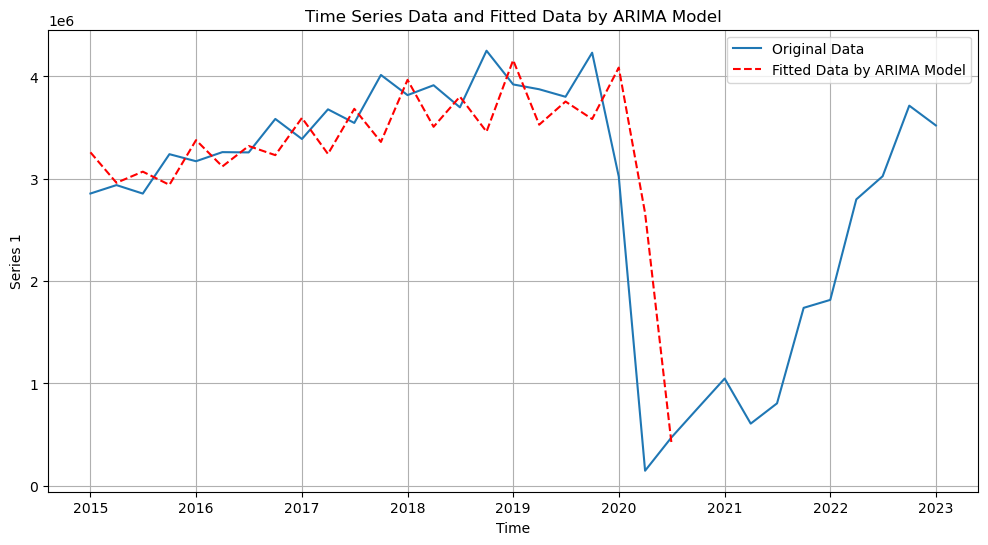

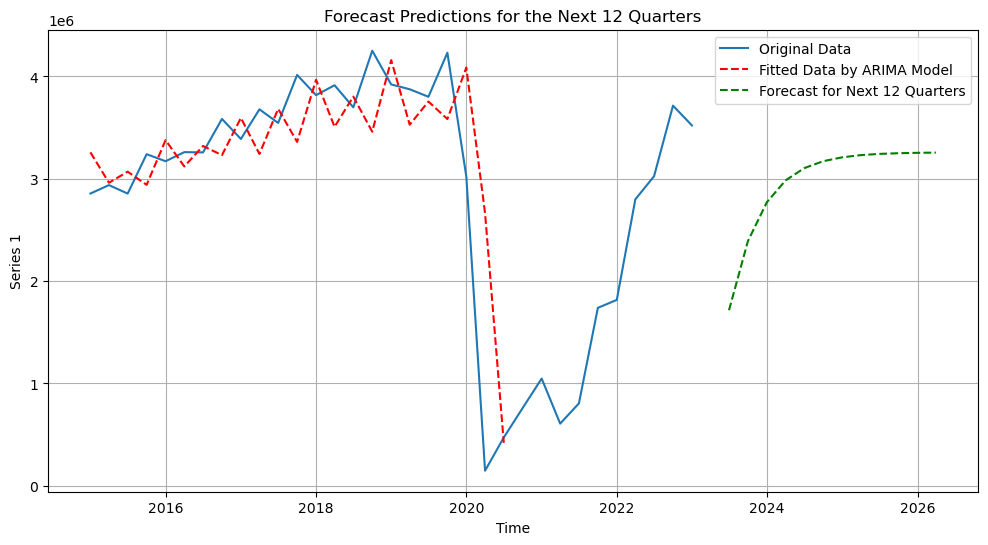

Forecasted Values for the Next 12 Quarters:
2023-06-30    1.715463e+06
2023-09-30    2.391367e+06
2023-12-31    2.771238e+06
2024-03-31    2.984733e+06
2024-06-30    3.104722e+06
2024-09-30    3.172157e+06
2024-12-31    3.210058e+06
2025-03-31    3.231358e+06
2025-06-30    3.243330e+06
2025-09-30    3.250058e+06
2025-12-31    3.253839e+06
2026-03-31    3.255965e+06
Freq: Q-DEC, Name: predicted_mean, dtype: float64
Forecasted values saved to 'forecasted_values.xlsx'


In [129]:
# Plot Visualization of Time Series Data and Fitted Data
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data')
plt.plot(train_data.index, train_forecast, label='Fitted Data by ARIMA Model', linestyle='--', color='red')
plt.title('Time Series Data and Fitted Data by ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Plot Forecast Predictions for the Next 12 Quarters
forecast_next_12_quarters = model_fit.forecast(steps=12)
forecast_next_12_quarters.index = pd.date_range(start='2023-06-30', periods=12, freq='Q')
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data')
plt.plot(train_data.index, train_forecast, label='Fitted Data by ARIMA Model', linestyle='--', color='red')
plt.plot(forecast_next_12_quarters.index, forecast_next_12_quarters, label='Forecast for Next 12 Quarters', linestyle='--', color='green')
plt.title('Forecast Predictions for the Next 12 Quarters')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Print Numerical Values of Forecasted Data
print("Forecasted Values for the Next 12 Quarters:")
print(forecast_next_12_quarters)

# Save Forecasted Data to an Excel file
forecast_next_12_quarters.to_excel('forecasted_values_AR_1,0,1.xlsx', index_label='Quarter')
print("Forecasted values saved to 'forecasted_values.xlsx'")

### ARIMA ORDER (1,0,2)

In [130]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit ARIMA model on the training set
model = ARIMA(train_data, order=(1, 0, 2))
model_fit = model.fit()

# Print ARIMA model results
print(model_fit.summary())

# Forecast using the ARIMA model on the training set
train_forecast = model_fit.fittedvalues

# Calculate evaluation metrics on the training set
train_mae = mean_absolute_error(train_data, train_forecast)
train_rmse = mean_squared_error(train_data, train_forecast, squared=False)

# Calculate MASE on the training set
naive_train_forecast = train_data.shift(4)  # Assuming quarterly seasonality
naive_train_residuals = train_data - naive_train_forecast
scaling_factor_train = np.mean(np.abs(naive_train_residuals))
train_mase = train_mae / scaling_factor_train

# Print evaluation metrics on the training set
print("Training Mean Absolute Error (MAE):", train_mae)
print("Training Root Mean Squared Error (RMSE):", train_rmse)
print("Training Mean Absolute Scaled Error (MASE):", train_mase)


                               SARIMAX Results                                
Dep. Variable:               Series 1   No. Observations:                   23
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -339.991
Date:                Thu, 11 Apr 2024   AIC                            689.982
Time:                        11:51:32   BIC                            695.660
Sample:                    01-01-2015   HQIC                           691.410
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.259e+06    5.8e+05      5.620      0.000    2.12e+06     4.4e+06
ar.L1         -0.3302      0.308     -1.071      0.284      -0.935       0.274
ma.L1          1.6062      0.427      3.762      0.0

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-i

### ARIMA ORDER (5,0,1)

In [131]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit ARIMA model on the training set
model = ARIMA(train_data, order=(5, 0, 1))
model_fit = model.fit()

# Print ARIMA model results
print(model_fit.summary())

# Forecast using the ARIMA model on the training set
train_forecast = model_fit.fittedvalues

# Calculate evaluation metrics on the training set
train_mae = mean_absolute_error(train_data, train_forecast)
train_rmse = mean_squared_error(train_data, train_forecast, squared=False)

# Calculate MASE on the training set
naive_train_forecast = train_data.shift(4)  # Assuming quarterly seasonality
naive_train_residuals = train_data - naive_train_forecast
scaling_factor_train = np.mean(np.abs(naive_train_residuals))
train_mase = train_mae / scaling_factor_train

# Print evaluation metrics on the training set
print("Training Mean Absolute Error (MAE):", train_mae)
print("Training Root Mean Squared Error (RMSE):", train_rmse)
print("Training Mean Absolute Scaled Error (MASE):", train_mase)


                               SARIMAX Results                                
Dep. Variable:               Series 1   No. Observations:                   23
Model:                 ARIMA(5, 0, 1)   Log Likelihood                -339.756
Date:                Thu, 11 Apr 2024   AIC                            695.512
Time:                        11:51:37   BIC                            704.596
Sample:                    01-01-2015   HQIC                           697.797
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.259e+06   8.04e+05      4.052      0.000    1.68e+06    4.83e+06
ar.L1          0.7865      1.568      0.501      0.616      -2.287       3.860
ar.L2         -0.3939      0.936     -0.421      0.6

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-i

### ARIMA ORDER (5,0,2)

In [132]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit ARIMA model on the training set
model = ARIMA(train_data, order=(5, 0, 2))
model_fit = model.fit()

# Print ARIMA model results
print(model_fit.summary())

# Forecast using the ARIMA model on the training set
train_forecast = model_fit.fittedvalues

# Calculate evaluation metrics on the training set
train_mae = mean_absolute_error(train_data, train_forecast)
train_rmse = mean_squared_error(train_data, train_forecast, squared=False)

# Calculate MASE on the training set
naive_train_forecast = train_data.shift(4)  # Assuming quarterly seasonality
naive_train_residuals = train_data - naive_train_forecast
scaling_factor_train = np.mean(np.abs(naive_train_residuals))
train_mase = train_mae / scaling_factor_train

# Print evaluation metrics on the training set
print("Training Mean Absolute Error (MAE):", train_mae)
print("Training Root Mean Squared Error (RMSE):", train_rmse)
print("Training Mean Absolute Scaled Error (MASE):", train_mase)


                               SARIMAX Results                                
Dep. Variable:               Series 1   No. Observations:                   23
Model:                 ARIMA(5, 0, 2)   Log Likelihood                -338.619
Date:                Thu, 11 Apr 2024   AIC                            695.238
Time:                        11:51:38   BIC                            705.458
Sample:                    01-01-2015   HQIC                           697.808
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.259e+06    8.6e+05      3.790      0.000    1.57e+06    4.94e+06
ar.L1          0.3255      0.790      0.412      0.680      -1.222       1.873
ar.L2         -0.5431      0.984     -0.552      0.5

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-i

# SARIMA MODEL

In [133]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit SARIMA model on the training set
model = SARIMAX(train_data, order=(1, 0, 2), seasonal_order=(0, 0, 0, 4))  # Assuming quarterly seasonality
model_fit = model.fit()

# Print SARIMA model results
print(model_fit.summary())

# Forecast using the SARIMA model on the training set
train_forecast = model_fit.fittedvalues

# Calculate evaluation metrics on the training set
train_mae = mean_absolute_error(train_data, train_forecast)
train_rmse = mean_squared_error(train_data, train_forecast, squared=False)

# Calculate MASE on the training set
naive_train_forecast = train_data.shift(4)  # Assuming quarterly seasonality
naive_train_residuals = train_data - naive_train_forecast
scaling_factor_train = np.mean(np.abs(naive_train_residuals))
train_mase = train_mae / scaling_factor_train

# Print evaluation metrics on the training set
print("Training Mean Absolute Error (MAE):", train_mae)
print("Training Root Mean Squared Error (RMSE):", train_rmse)
print("Training Mean Absolute Scaled Error (MASE):", train_mase)


                               SARIMAX Results                                
Dep. Variable:               Series 1   No. Observations:                   23
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -343.668
Date:                Thu, 11 Apr 2024   AIC                            695.336
Time:                        11:51:40   BIC                            699.878
Sample:                    01-01-2015   HQIC                           696.478
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9623      0.093     10.298      0.000       0.779       1.145
ma.L1          0.1317      0.244      0.539      0.590      -0.347       0.610
ma.L2         -0.1076      0.562     -0.192      0.8

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


# plot predicted and forecast next 12 quarter

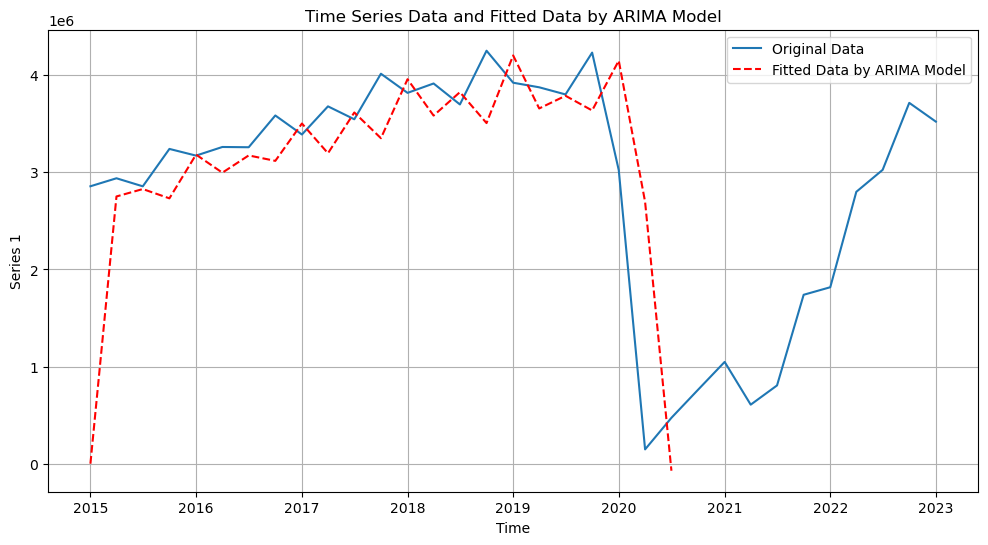

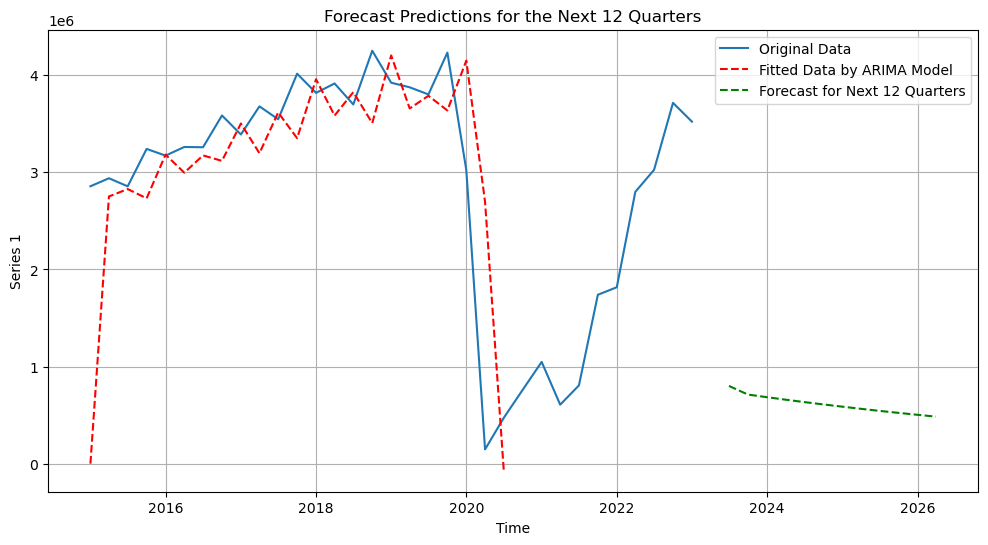

Forecasted Values for the Next 12 Quarters:
2023-06-30    800269.193254
2023-09-30    711466.165784
2023-12-31    684629.169274
2024-03-31    658804.482859
2024-06-30    633953.921501
2024-09-30    610040.740528
2024-12-31    587029.581302
2025-03-31    564886.418939
2025-06-30    543578.511997
2025-09-30    523074.354061
2025-12-31    503343.627163
2026-03-31    484357.156948
Freq: Q-DEC, Name: predicted_mean, dtype: float64
Forecasted values saved to 'forecasted_values.xlsx'


In [134]:
import matplotlib.pyplot as plt

# Plot Visualization of Time Series Data and Fitted Data
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data')
plt.plot(train_data.index, train_forecast, label='Fitted Data by ARIMA Model', linestyle='--', color='red')
plt.title('Time Series Data and Fitted Data by ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Plot Forecast Predictions for the Next 12 Quarters
forecast_next_12_quarters = model_fit.forecast(steps=12)
forecast_next_12_quarters.index = pd.date_range(start='2023-06-30', periods=12, freq='Q')
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data')
plt.plot(train_data.index, train_forecast, label='Fitted Data by ARIMA Model', linestyle='--', color='red')
plt.plot(forecast_next_12_quarters.index, forecast_next_12_quarters, label='Forecast for Next 12 Quarters', linestyle='--', color='green')
plt.title('Forecast Predictions for the Next 12 Quarters')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()

# Print Numerical Values of Forecasted Data
print("Forecasted Values for the Next 12 Quarters:")
print(forecast_next_12_quarters)

# Save Forecasted Data to an Excel file
forecast_next_12_quarters.to_excel('forecasted_values_SARIMA_102.xlsx', index_label='Quarter')
print("Forecasted values saved to 'forecasted_values.xlsx'")


# ETS MODEL

In [149]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit ETS model on the training set
ets_model = ExponentialSmoothing(train_data, seasonal_periods=4, trend='add', seasonal='add')
ets_fit = ets_model.fit()

# Print ETS model results
print(ets_fit.summary())

# Forecast using the ETS model on the training set
train_forecast = ets_fit.fittedvalues

# Calculate evaluation metrics on the training set
train_mae = mean_absolute_error(train_data, train_forecast)
train_rmse = mean_squared_error(train_data, train_forecast, squared=False)

# Calculate MASE on the training set
naive_train_forecast = train_data.shift(4)  # Assuming quarterly seasonality
naive_train_residuals = train_data - naive_train_forecast
scaling_factor_train = np.mean(np.abs(naive_train_residuals))
train_mase = train_mae / scaling_factor_train

# Print evaluation metrics on the training set
print("Training Mean Absolute Error (MAE):", train_mae)
print("Training Root Mean Squared Error (RMSE):", train_rmse)
print("Training Mean Absolute Scaled Error (MASE):", train_mase)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Series 1   No. Observations:                   23
Model:             ExponentialSmoothing   SSE                 10020241110448.762
Optimized:                         True   AIC                            632.403
Trend:                         Additive   BIC                            641.487
Seasonal:                      Additive   AICC                           650.736
Seasonal Periods:                     4   Date:                 Thu, 11 Apr 2024
Box-Cox:                          False   Time:                         16:21:22
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6060714                alpha                 True
smoothing_trend          

C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### TIME SERIES AND FORECAST BY ETS MODEL

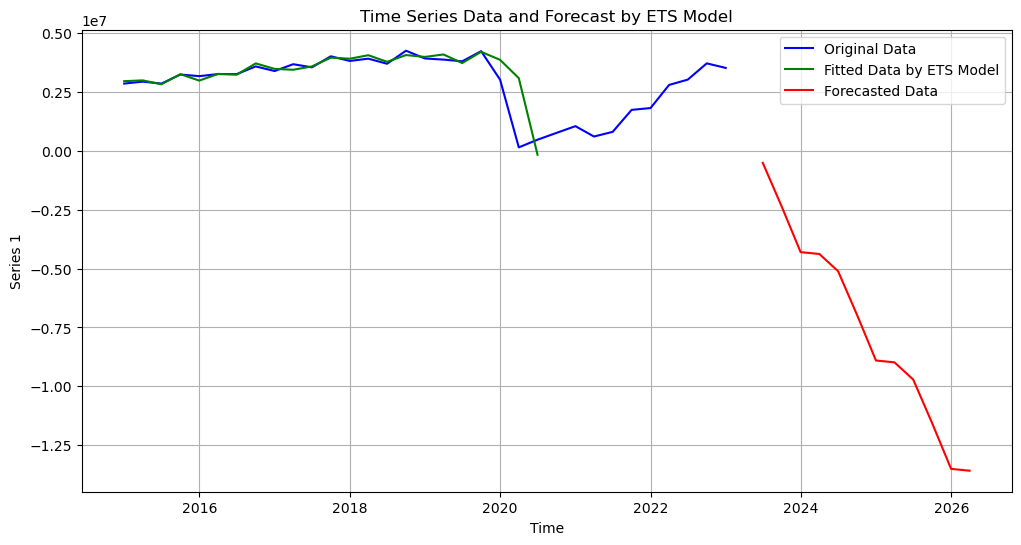

In [150]:
import matplotlib.pyplot as plt

# Plot original time series data
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Series 1'], label='Original Data', color='blue')

# Plot fitted data by ETS model
plt.plot(train_forecast.index, train_forecast, label='Fitted Data by ETS Model', color='green')

# Plot forecasted values for the next 12 quarters
forecast_steps = 12
forecast_index = pd.date_range(start=df1.index[-1], periods=forecast_steps + 1, freq='Q')[1:]  # Start from the next quarter
forecast_values = ets_fit.forecast(steps=forecast_steps)
plt.plot(forecast_index, forecast_values, label='Forecasted Data', color='red')

plt.title('Time Series Data and Forecast by ETS Model')
plt.xlabel('Time')
plt.ylabel('Series 1')
plt.legend()
plt.grid(True)
plt.show()


In [151]:
# Convert forecasted values to a DataFrame
forecast_df = pd.DataFrame(forecast_next_12_quarters, columns=['Forecasted Values'])

# Save the DataFrame to an Excel file
forecast_df.to_excel('forecasted_values.xlsx', index_label='Quarter')

print("Forecasted values saved to 'forecasted_values.xlsx'")



Forecasted values saved to 'forecasted_values.xlsx'


In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Shift the training data by one period to get the naive forecast
naive_train_forecast = train_data.shift(1)

# Drop the first row (which contains NaN after shifting)
naive_train_forecast = naive_train_forecast.dropna()

# Calculate evaluation metrics
mae = mean_absolute_error(train_data[1:], naive_train_forecast)
rmse = mean_squared_error(train_data[1:], naive_train_forecast, squared=False)

# Calculate MASE
naive_train_residuals = train_data[1:] - naive_train_forecast
scaling_factor = np.mean(np.abs(naive_train_residuals))
mase = mae / scaling_factor

# Print Model Results
print("Naive Forecast Model Results:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Scaled Error (MASE): {mase}")


Naive Forecast Model Results:
Mean Absolute Error (MAE): 385427.45454545453
Root Mean Squared Error (RMSE): 712858.5697458922
Mean Absolute Scaled Error (MASE): 1.0


In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Simple average forecast model
simple_average_forecast = train_data.mean()

# Create a forecast array with the same length as the training data, filled with the simple average forecast
simple_average_forecast = np.full_like(train_data, simple_average_forecast)

# Calculate evaluation metrics
simple_average_mae = mean_absolute_error(train_data, simple_average_forecast)
simple_average_rmse = mean_squared_error(train_data, simple_average_forecast, squared=False)

# Calculate MASE
simple_average_residuals = train_data - simple_average_forecast
scaling_factor = np.mean(np.abs(simple_average_residuals))
simple_average_mase = simple_average_mae / scaling_factor

# Print model results and evaluation metrics
print("Simple Average Forecast Model Results:")
print("Mean Absolute Error (MAE):", simple_average_mae)
print("Root Mean Squared Error (RMSE):", simple_average_rmse)
print("Mean Absolute Scaled Error (MASE):", simple_average_mase)


Simple Average Forecast Model Results:
Mean Absolute Error (MAE): 640558.6143667297
Root Mean Squared Error (RMSE): 997324.6555811268
Mean Absolute Scaled Error (MASE): 1.0


In [154]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit simple exponential smoothing model on the training set
ses_model = SimpleExpSmoothing(train_data)
ses_fit = ses_model.fit()

# Generate forecast using the simple exponential smoothing model
ses_forecast = ses_fit.forecast(len(test_data))

# Calculate evaluation metrics
ses_mae = mean_absolute_error(test_data, ses_forecast)
ses_rmse = mean_squared_error(test_data, ses_forecast, squared=False)

# Calculate MASE
ses_residuals = test_data - ses_forecast
scaling_factor = np.mean(np.abs(ses_residuals))
ses_mase = ses_mae / scaling_factor

# Print model results and evaluation metrics
print("Simple Exponential Smoothing Model Results:")
print("Mean Absolute Error (MAE):", ses_mae)
print("Root Mean Squared Error (RMSE):", ses_rmse)
print("Mean Absolute Scaled Error (MASE):", ses_mase)


Simple Exponential Smoothing Model Results:
Mean Absolute Error (MAE): 1513199.5767875514
Root Mean Squared Error (RMSE): 1890758.4178523435
Mean Absolute Scaled Error (MASE): 1.0


C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\JITENDRA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
